## Problem 4 - Dimensionality reduction with PCA

* Professors Hugh Bell and Wee Zell were recording extracellular action potentials.
* Recorded traces likely arose from multiple cells, with each cell producing a characteristic waveform.
* windowedSpikes.mat containing a 400x150 matrix, data, whose rows contain the electrode measurements (voltages recorded for each 150 msec window, at 1msec intervals). Your task is to determine how many neurons produced these 400 spikes.

In [1]:
import trichromacy as tri
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
#Load given data
Spike_data= loadmat('windowedSpikes.mat')
np.shape(Spike_data)

()

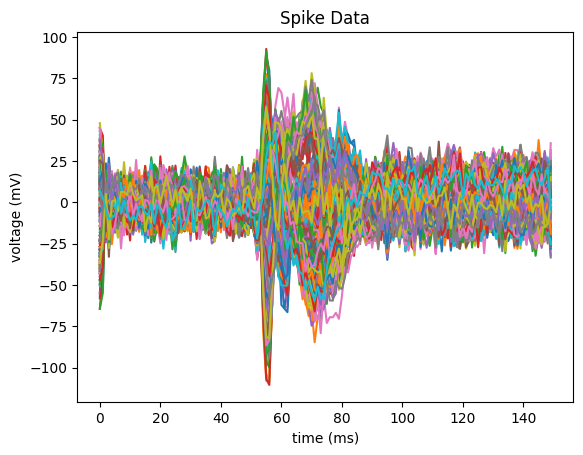

In [2]:
# a) Plot spikes
spikes = Spike_data['data']
figure,ax= plt.subplots()

for i in range(len(spikes)):
    ax.plot(spikes[i,:])
    ax.set_xlabel(xlabel='time (ms)')
    ax.set_ylabel(ylabel='voltage (mV)')
    ax.set_title('Spike Data')


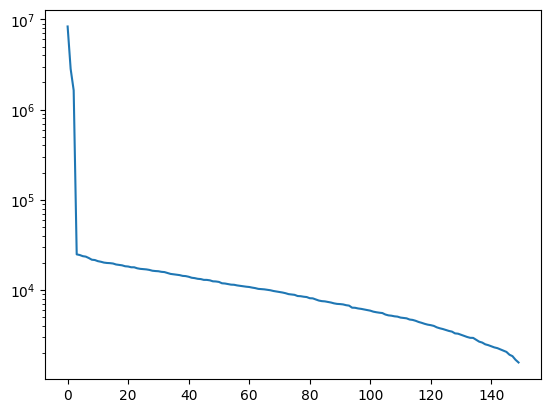

In [3]:
# b) 
pca = PCA()
pca.fit(spikes)
# print(pca.singular_values_)
figure,ax=plt.subplots()
ax.plot(pca.singular_values_**2)
ax.set_yscale('log')
plt.show()

Mayority of spikes are happening over the scale of a few milliseconds

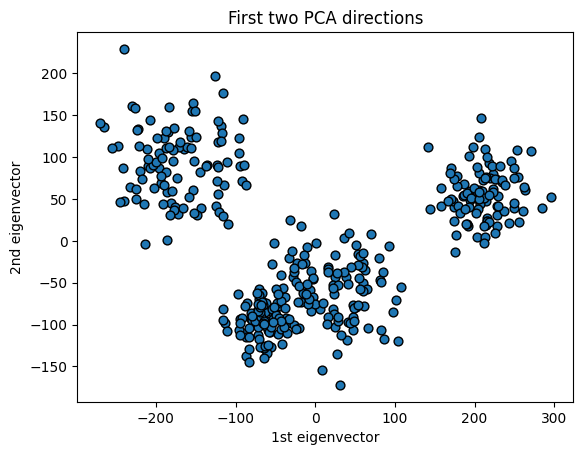

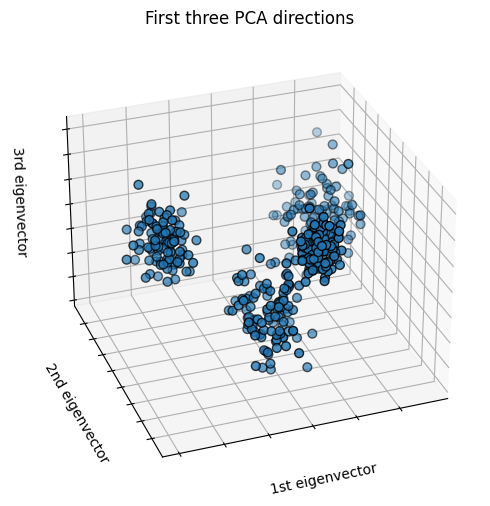

In [4]:
#c) Project spike waveforms onto the top of the two principal components of the data set
Projected_Spikes_2D = PCA(n_components=2).fit_transform(spikes)

fig,ax = plt.subplots()
ax.scatter(Projected_Spikes_2D[:, 0],Projected_Spikes_2D[:, 1],cmap=plt.cm.Set1, edgecolor="k",s=40,)

ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
plt.show()


#d) Project spike waveforms onto the top of the three principal components of the data set
Projected_Spikes_3D = PCA(n_components=3).fit_transform(spikes)
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    Projected_Spikes_3D[:, 0],
    Projected_Spikes_3D[:, 1],
    Projected_Spikes_3D[:, 2],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

To visualize the 3D plot in an interactive manner download Axes3D, using the following command:   
        ```
            pip3 install ipympl    
        ```

C:\Users\Juan Pablo Botero T\AppData\Local\Temp\ipykernel_63992\1368186573.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


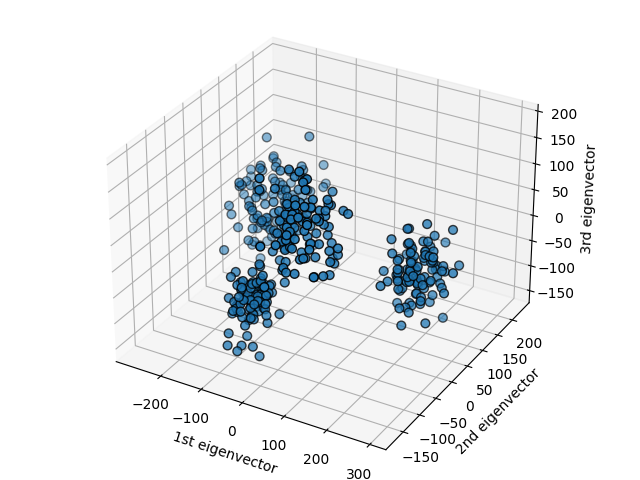

In [5]:
%matplotlib widget
fig = plt.figure()
ax = Axes3D(fig)
  
# creating the plot
ax.scatter(
    Projected_Spikes_3D[:, 0],
    Projected_Spikes_3D[:, 1],
    Projected_Spikes_3D[:, 2],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
  
# setting title and labels
ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
  
# displaying the plot
plt.show()